<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title></title>
</head>
<body>
<div style="text-align: center;">
  <h1>Task 1</h1>
  <h2>Distinguishing between Abdominal and Heart Ultrasounds</h2>
</div>
<h3>Loading Images:</h3>
<p>Loading images from different directories. There are two types of image formats: 'jpg' and 'tiff'. This line of code helps us become familiar with the number of images.</p>
</body>
</html>


In [1]:

import os  # For handling directories and also file's path
import cv2  # img processing
import numpy as np 
from tqdm import tqdm  # It is for progress bars during loading

# We define  function for  load images from a perticuler directory.
def load_images_from_directory(directory_path):
    # empty list for storing the imag
    images = []
    
    # Iterate in each file in the directory
    for file in os.listdir(directory_path):
        # Checking  if the file ends with either '.jpg' or '.tiff'
        if file.endswith('.jpg') or file.endswith('.tiff'):
            # Reading  the images file using openCV and convert it to grayscale
            img = cv2.imread(os.path.join(directory_path, file), cv2.IMREAD_GRAYSCALE)
            # Append the grayscale image to the list of images
            images.append(img)
    
    # Return the list of images
    return images

# these are the paths to directories containing different types of imag i know in first there is no need to accese all img but just for clear understanding 
closed_heart_path = 'data/heart/closed'  
open_heart_path = 'data/heart/open' 
contours_path = 'data/heart/various/contours' 
masks_path = 'data/heart/various/masks' 
non_heart_path = 'data/non-heart' 

closed_heart_images = load_images_from_directory(closed_heart_path)
open_heart_images = load_images_from_directory(open_heart_path)
contours_images = load_images_from_directory(contours_path)
masks_images = load_images_from_directory(masks_path)
non_heart_images = load_images_from_directory(non_heart_path)

# convert the lists of images into NumPy arrays for easier manipulation
closed_heart_images = np.array(closed_heart_images)
open_heart_images = np.array(open_heart_images)
contours_images = np.array(contours_images)
masks_images = np.array(masks_images)
non_heart_images = np.array(non_heart_images)



print("Heart ultrasound images:")
print("Total number of closed heart ultrasound images:", len(closed_heart_images))
print("Total number of open heart ultrasound images:", len(open_heart_images))
print("Total number of various heart ultrasound images:", len(contours_images))
print("Total number of mask images:", len(masks_images))

print("\nNon-Heart Ultrasound Images:")
print("Number of non-heart images:", len(non_heart_images))




Heart ultrasound images:
Total number of closed heart ultrasound images: 80
Total number of open heart ultrasound images: 138
Total number of various heart ultrasound images: 218
Total number of mask images: 218

Non-Heart Ultrasound Images:
Number of non-heart images: 925


<h3>This code display few images from each dir of ultrasound image just for a clear 
idea about the images </h3>

Visualizing 5 Closed Heart ultrasound images:


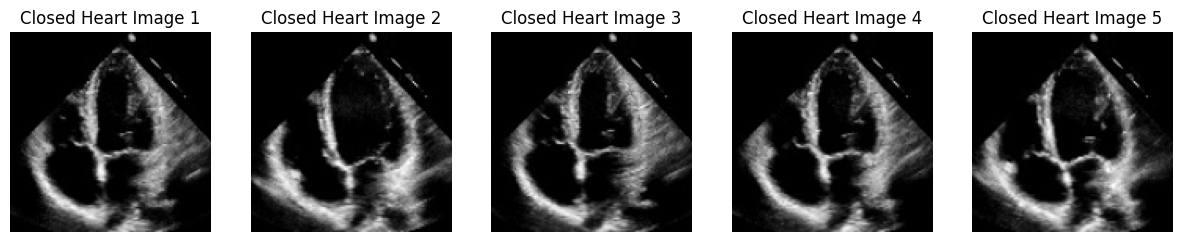

Visualizing 5 Open Heart ultrasound images:


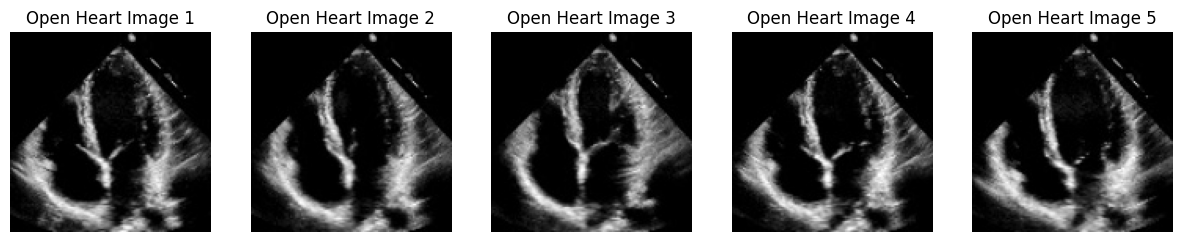

Visualizing 5 Various Heart ultrasound images:


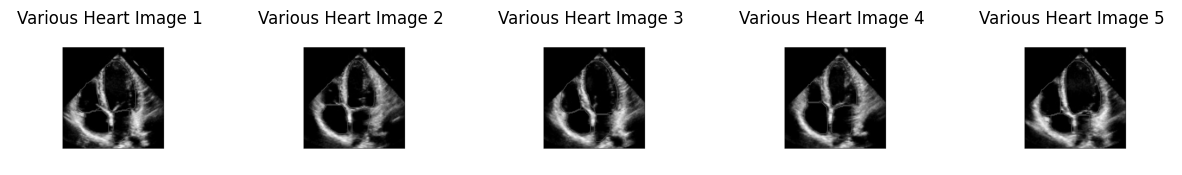

Visualizing 5 Mask ultrasound images:


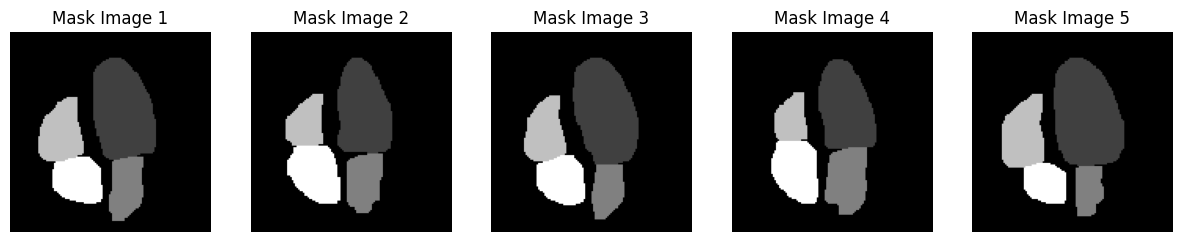

In [2]:
import matplotlib.pyplot as plt
def visualize_imagess(images, category, num_images=5):
    print(f"Visualizing {num_images} {category} ultrasound images:")
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"{category} Image {i+1}")
    plt.show()

#for closed heart
visualize_imagess(closed_heart_images, "Closed Heart")

#for open
visualize_imagess(open_heart_images, "Open Heart")

#for tiff format heart
visualize_imagess(contours_images, "Various Heart")

#for mask
visualize_imagess(masks_images, "Mask")




<h3> This code helps to prepare the ultrasound images data from heart and non-heart into a Pandas dataframe for further machine learning tasks.</h3>

<p><strong>Resize Image:</strong> Resizes the images to wid t7525 and heit h7525 pixels.</p>

<p><strong>Binarization:</strong> Converts the grayscale images into binary images.</p>

<p><strong>Normalize:</strong> Normalizes the pixel values of the image to a range between 0 and 1.</p>



In [59]:
import cv2
import os
import numpy as np
import pandas as pd

resize_width = 75
resize_height = 75

#this function for loading img with correct format 
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            
            #image resize(25*25)
            img = cv2.resize(img, (resize_width, resize_height))
            
            
           # Apply histogram equalization
            img = cv2.equalizeHist(img)
            
            # and then normalizations
            normalized_img = binary_img.astype('float32') / 255.0
            
            images.append(normalized_img.flatten())
    labels = [label] * len(images)
    return images, labels

closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'mask')
open_images, open_labels = load_and_flatten_images(open_heart_path, 'mask')
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'nomask')

#combining the  closed heart and open heart because for first task we only need these two types of heart 
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

#converting it into dataframe pd converstions 
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# converting the  non heart into dataframe 
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# displaying the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)


Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...  616  617  618  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
213  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
214  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
215  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
216  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   
217  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  0.0   

     619  620  621  622  623  624  class  
0    0.


 <h3>Lets see after normlization and binarization how images does lookes see the result below.</h3>

ValueError: cannot reshape array of size 625 into shape (75,75)

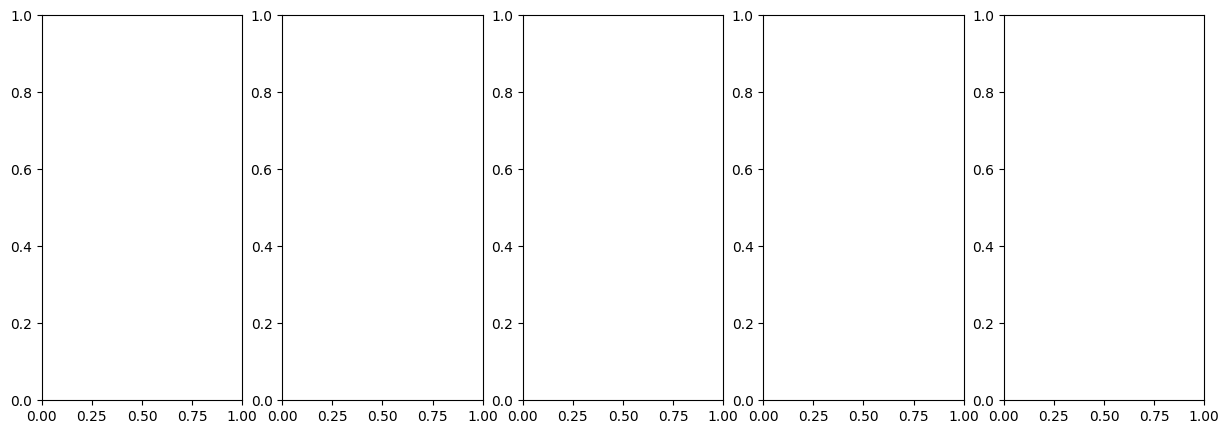

In [64]:
import matplotlib.pyplot as plt

# Convert heart images and abdominal images to NumPy arrays of float type
heart_images = heart_data.iloc[:, :-1].values.astype(float)
abdominal_images = non_heart_data.iloc[:, :-1].values.astype(float)

# Plot original heart images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(heart_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Heart Image')
plt.show()

# Plot original abdominal images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(abdominal_images[i].reshape(resize_width, resize_height), cmap='gray')
    axes[i].set_title('Original Abdominal Image')
plt.show()


.


<h3>4: below this code train multiple classifiers machine learning model on heart images and non heart images so that machine model can under stand the pattern of non-heart and heart to predict the correct output </h3>

<h4>->support vector machine</h4>
<h4>-> rendom forest</h4>
<h4>-> naive bayes</h4>   

In [6]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# loading heart dataframe and non heart dataframe 
X_heart = heart_data.drop('class', axis=1)
y_heart = heart_data['class'] # this is lable or in simple word column attribute 

#spliting data in to feature and lables 
X_non_heart = non_heart_data.drop('class', axis=1)
y_non_heart = non_heart_data['class']

# spliting data in train and test for heart
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42, stratify=y_heart)

# spliting data in train and test for non heart 
X_train_non_heart, X_test_non_heart, y_train_non_heart, y_test_non_heart = train_test_split(X_non_heart, y_non_heart, test_size=0.2, random_state=42, stratify=y_non_heart)

X_train = pd.concat([X_train_heart, X_train_non_heart], axis=0)
X_test = pd.concat([X_test_heart, X_test_non_heart], axis=0)
y_train = pd.concat([y_train_heart, y_train_non_heart], axis=0)
y_test = pd.concat([y_test_heart, y_test_non_heart], axis=0)


#train the classifire
svm = SVC(probability=True)  #this true ensure to enable predict_proba so it can work efficently
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

#prictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

#  now evavulate the machine learning model
svm_precision = precision_score(y_test, svm_preds, average='weighted')
svm_recall = recall_score(y_test, svm_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')

rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

nb_precision = precision_score(y_test, nb_preds, average='weighted')
nb_recall = recall_score(y_test, nb_preds, average='weighted')
nb_f1 = f1_score(y_test, nb_preds, average='weighted')

# calcualte auc_roc _score (Week 7 (5/3) – TOPIC 6: Metrics for Performance Evaluation)
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test, svm_scores)


rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)


joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(nb, 'nb_model.pkl')
svm = joblib.load('svm_model.pkl')
rf = joblib.load('rf_model.pkl')
nb = joblib.load('nb_model.pkl')

SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0
SVM AUC-ROC: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1-score: 1.0
Naive Bayes AUC-ROC: 1.0






<h3>lets cheack are these model working correct or not so i create a folder sometestingofmodel there is some unseen data i test these data in these model check the result so i got perfact result </h3>

<h4>mask=heart</h4>

<h4>non_mask= non-heart</h4>

In [7]:
import os

#folder which is containing the unseen img data 
test_image_dir = r'sometestingofmodel'
test_images = []
for file in os.listdir(test_image_dir):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        img = cv2.imread(os.path.join(test_image_dir, file), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, (resize_width, resize_height))
        binary_img = cv2.adaptiveThreshold(img_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        normalized_img = binary_img.astype('float32') / 255.0
        test_images.append(normalized_img.flatten())
X_test = pd.DataFrame(test_images)



# make the predictions 
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# display the output
# I know we are not working with tiff format type img just for my prectise im writing complete code 
for i, file in enumerate(os.listdir(test_image_dir)):
    if file.endswith('.jpg') or file.endswith('.tiff'):
        print(f"Image: {file}, SVM Prediction: {svm_preds[i]}, RF Prediction: {rf_preds[i]}, NB Prediction: {nb_preds[i]}")




Image: 1.jpg, SVM Prediction: nomask, RF Prediction: nomask, NB Prediction: nomask
Image: 39.jpg, SVM Prediction: mask, RF Prediction: mask, NB Prediction: mask
Image: 6.jpg, SVM Prediction: mask, RF Prediction: mask, NB Prediction: mask




<h3>Same thing we ll be doing for  Convolutional Neural Network (CNN)</h3>
<h4>I took some code from  this website </h4>
<a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=DSPCom-KmApV" target="_blank">https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=DSPCom-KmApV</a>


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models


# spliting data  for train and test
all_images = np.concatenate([heart_images, non_heart_images])
all_labels = np.concatenate([heart_labels, non_heart_labels])
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

#yes we have done this step normalization but its good prectise to ensure again your code 
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

image_shape = (25, 25, 1)  #  grayscale images with dimensions 25x25
train_images_reshaped = train_images_normalized.reshape(-1, 25, 25, 1)
test_images_reshaped = test_images_normalized.reshape(-1, 25, 25, 1)

#its a one hot encoding so that it will convert all string into numerical format for easy manipulation for machine learning model
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_test_labels = label_encoder.transform(test_labels)
num_classes = len(label_encoder.classes_)

#  architecture of the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compiling the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Training the model
cnn_model.fit(train_images_reshaped, encoded_train_labels, epochs=10, batch_size=32, validation_split=0.1)

# Evaluating the model
test_loss, test_accuracy = cnn_model.evaluate(test_images_reshaped, encoded_test_labels)
print('Test accuracy:', test_accuracy)

# saving this model in this perticuler location its a pb format type.
cnn_model.save(r'C:\Users\Hp\Desktop\ads')





Epoch 1/10


26/26 [==============================] - 5s 46ms/step - loss: 0.5518 - accuracy: 0.8078 - val_loss: 0.5052 - val_accuracy: 0.8261
Epoch 2/10
26/26 [==============================] - 1s 25ms/step - loss: 0.5089 - accuracy: 0.8078 - val_loss: 0.4600 - val_accuracy: 0.8261
Epoch 3/10
26/26 [==============================] - 0s 17ms/step - loss: 0.4890 - accuracy: 0.8078 - val_loss: 0.4738 - val_accuracy: 0.8261
Epoch 4/10
26/26 [==============================] - 0s 17ms/step - loss: 0.4906 - accuracy: 0.8078 - val_loss: 0.4654 - val_accuracy: 0.8261
Epoch 5/10
26/26 [==============================] - 0s 17ms/step - loss: 0.4946 - accuracy: 0.8078 - val_loss: 0.4696 - val_accuracy: 0.8261
Epoch 6/10
26/26 [==============================] - 0s 18ms/step - loss: 0.4883 - accuracy: 0.8078 - val_loss: 0.4524 - val_accuracy: 0.8261
Epoch 7/10
26/26 [==============================] - 0s 17ms/step - loss: 0.4790 - accuracy: 0.8078 - val_loss: 0.4607 - val_accuracy: 0.8261
Epoch 8/

INFO:tensorflow:Assets written to: C:\Users\Hp\Desktop\ads\assets


 <h2 style="text-align: center;">Short Report of Calculated Model Accuracy</h2>


<table>
  <tr>
    <th>Model</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1-score</th>
    <th>AUC-ROC</th>
  </tr>
  <tr>
    <td>SVM</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
    <td>1.0</td>
  </tr>
</table><h5 style="text-align: center;">Test accuracy of CNN model: 0.807860255241394</h5>

<h6>all models performing  perfact on  evaluation metric  and achieving acurate  scores in many scenario like  precision, recall, F1-score, and auc-roc. It is prove that they accurately categorizing  the unseen  heart and abdominal images without any mistakes. 
While  models getting high score in this  evaluation, there may be further more exploration and testing needed to determine the most suitable and perfact  model for large unseen data  . and we are still not sure here because of accuracy is high so we will perform some other evaluations to find best model.. 
</h6>


<h5>
  <li>
    The validation accuracy is high, reaching 100% accuracy in some epochs. This might be a sign of overfitting, as the model could be memorizing the data patterns. To ensure this, we will perform <h3>five-fold cross-validation</h3>.
  </li>
</h5>
<img src="https://www.researchgate.net/profile/Ivanna-Baturynska/publication/340524896/figure/fig4/AS:878319096565762@1586418999414/Description-of-5-fold-cross-validation.png" alt="Description of 5-fold cross-validation" style="width: 50%;">
<p>"The five-fold cross-validation (CV) is a process when all data is randomly split into k folds, in our case k = 5, and then the model is trained on the k − 1 folds, while one fold is left to test a model . This procedure is repeated k times."</p>
<p>i took this from -><a href="https://www.researchgate.net/figure/Description-of-5-fold-cross-validation_fig4_340524896#:~:text=...%20the%20five%2Dfold,procedure%20is%20repeated%20k%20times." target="_blank">https://www.researchgate.net/figure/Description-of-5-fold-cross-validation_fig4_340524896#:~:text=...%20the%20five%2Dfold,procedure%20is%20repeated%20k%20times.</a></p>


In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

X_heart = heart_data.drop('class', axis=1)
y_heart = heart_data['class']

X_combined = np.concatenate((X_heart, X_non_heart), axis=0)
y_combined = np.concatenate((y_heart, y_non_heart), axis=0)

# number of folds 
n_folds = 5

# list for stroing the evavulations
svm_precisions, svm_recalls, svm_f1s = [], [], []
rf_precisions, rf_recalls, rf_f1s = [], [], []
nb_precisions, nb_recalls, nb_f1s = [], [], []

# perfroming  n-fold cross-validation on SVM, Random Forest , Naive Bayes
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
for fold_idx, (train_index, test_index) in enumerate(skf.split(X_combined, y_combined), 1):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y_combined[train_index], y_combined[test_index]
    
    #train machine learning model like we did earlier 
    svm = SVC()
    svm.fit(X_train, y_train)
    svm_preds = svm.predict(X_test)
    svm_prec = precision_score(y_test, svm_preds, average='weighted')
    svm_rec = recall_score(y_test, svm_preds, average='weighted')
    svm_f1 = f1_score(y_test, svm_preds, average='weighted')
    svm_precisions.append(svm_prec)
    svm_recalls.append(svm_rec)
    svm_f1s.append(svm_f1)
    

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_prec = precision_score(y_test, rf_preds, average='weighted')
    rf_rec = recall_score(y_test, rf_preds, average='weighted')
    rf_f1 = f1_score(y_test, rf_preds, average='weighted')
    rf_precisions.append(rf_prec)
    rf_recalls.append(rf_rec)
    rf_f1s.append(rf_f1)
    

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_preds = nb.predict(X_test)
    nb_prec = precision_score(y_test, nb_preds, average='weighted')
    nb_rec = recall_score(y_test, nb_preds, average='weighted')
    nb_f1 = f1_score(y_test, nb_preds, average='weighted')
    nb_precisions.append(nb_prec)
    nb_recalls.append(nb_rec)
    nb_f1s.append(nb_f1)
    
    # print the each fold evaluations for better understanding 
    print(f"Fold {fold_idx}:")
    print("SVM Precision:", svm_prec)
    print("SVM Recall:", svm_rec)
    print("SVM F1-score:", svm_f1)
    print()
    print("Random Forest Precision:", rf_prec)
    print("Random Forest Recall:", rf_rec)
    print("Random Forest F1-score:", rf_f1)
    print()
    print("Naive Bayes Precision:", nb_prec)
    print("Naive Bayes Recall:", nb_rec)
    print("Naive Bayes F1-score:", nb_f1)
    print("-" * 50)

# Print average evaluation metrics for each model
print("Average Evaluation Metrics:")
print("SVM Precision:", np.mean(svm_precisions))
print("SVM Recall:", np.mean(svm_recalls))
print("SVM F1-score:", np.mean(svm_f1s))
print()
print("Random Forest Precision:", np.mean(rf_precisions))
print("Random Forest Recall:", np.mean(rf_recalls))
print("Random Forest F1-score:", np.mean(rf_f1s))
print()
print("Naive Bayes Precision:", np.mean(nb_precisions))
print("Naive Bayes Recall:", np.mean(nb_recalls))
print("Naive Bayes F1-score:", np.mean(nb_f1s))


Fold 1:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1-score: 1.0
--------------------------------------------------
Fold 2:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1-score: 1.0
--------------------------------------------------
Fold 3:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1-score: 1.0
--------------------------------------------------
Fold 4:
SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-score: 1.0

Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1-score: 1.0

Naive Bayes Precision: 1.0
Naive

In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

image_shape = (25, 25, 1)  
num_classes = 2 
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Loading  your data im reapting some step again this is for clear code and clear view persentable . it wont affect the my result .
X = np.concatenate([heart_images, non_heart_images], axis=0)
y = np.concatenate([heart_labels, non_heart_labels], axis=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
fold = 0
for train_index, test_index in skf.split(X, y):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    X_train_normalized = X_train.astype('float32') / 255.0
    X_test_normalized = X_test.astype('float32') / 255.0
   
    X_train_reshaped = X_train_normalized.reshape(-1, *image_shape)
    X_test_reshaped = X_test_normalized.reshape(-1, *image_shape)
    
#one hot encoding changing the lable data into newmeric format
    label_encoder = LabelEncoder()
    encoded_train_labels = label_encoder.fit_transform(y_train)
    encoded_test_labels = label_encoder.transform(y_test)
    
    model.fit(X_train_reshaped, encoded_train_labels, epochs=5, batch_size=32, validation_split=0.1)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(X_test_reshaped, encoded_test_labels)
    print(f"Fold {fold}: Train samples: {len(train_index)}, Test samples: {len(test_index)}, Test accuracy: {test_acc}")


Epoch 1/5
26/26 [==============================] - 3s 35ms/step - loss: 0.5666 - accuracy: 0.7883 - val_loss: 0.2890 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 0s 16ms/step - loss: 0.5179 - accuracy: 0.7883 - val_loss: 0.2132 - val_accuracy: 1.0000
Epoch 3/5
26/26 [==============================] - 0s 17ms/step - loss: 0.5143 - accuracy: 0.7883 - val_loss: 0.2875 - val_accuracy: 1.0000
Epoch 4/5
26/26 [==============================] - 0s 17ms/step - loss: 0.5120 - accuracy: 0.7883 - val_loss: 0.2084 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 0s 7ms/step - loss: 0.4668 - accuracy: 0.8079
Fold 1: Train samples: 914, Test samples: 229, Test accuracy: 0.807860255241394
Epoch 1/5
26/26 [==============================] - 1s 21ms/step - loss: 0.4814 - accuracy: 0.7883 - val_loss: 0.2894 - val_accuracy: 1.0000
Epoch 2/5
26/26 [==============================] - 0s 15ms/step - loss: 0.3739 - accuracy: 0.7883 - val_loss: 0.1084 - val_ac

<h5>
  <li>
    Each fold has an accuracy of 1 or near to one, indicating that all models are working absolutely fantastic.
  </li>
</h5>

<p><h2>Data augmentation</h2> still  i have doubt on my trained model so , data augmentation can resolve variety of problems when training cnn model, for example imblaced data, overfitting and variations of complexity.</p>
<p></p>


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0


input_shape = (25, 25, 1) 
X_train_reshaped = X_train_normalized.reshape(-1, 25, 25, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 25, 25, 1)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_reshaped)

model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=32), epochs=10, validation_data=(X_test_reshaped, y_test_encoded))

#now i can be sure that these all model are capeble of  classification of heart non heart  with excellent accuracy 

Epoch 1/10
29/29 [==============================] - 2s 35ms/step - loss: 0.5077 - accuracy: 0.8348 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 1s 31ms/step - loss: 0.2517 - accuracy: 0.8851 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 1s 32ms/step - loss: 0.1853 - accuracy: 0.9245 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 1s 31ms/step - loss: 0.1635 - accuracy: 0.9354 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 1s 31ms/step - loss: 0.2048 - accuracy: 0.9147 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 1s 32ms/step - loss: 0.1311 - accuracy: 0.9497 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 1s 31ms/step - loss: 0.1462 - accuracy: 0.9387 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 8/10
29

<h2>Now we can ensure cnn model is working very well and we see it by visually</h2>

Epoch 1/50
29/29 [==============================] - 1s 34ms/step - loss: 0.1002 - accuracy: 0.9573 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/50
29/29 [==============================] - 1s 31ms/step - loss: 0.1437 - accuracy: 0.9420 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 3/50
29/29 [==============================] - 1s 32ms/step - loss: 0.3526 - accuracy: 0.8654 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 4/50
29/29 [==============================] - 1s 31ms/step - loss: 0.1455 - accuracy: 0.9475 - val_loss: 0.0191 - val_accuracy: 1.0000


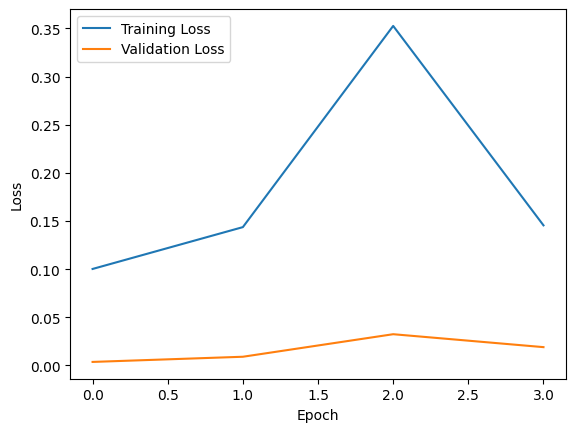

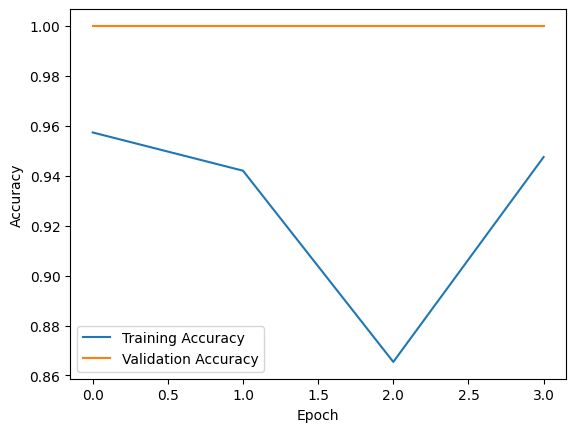

8/8 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000
Test Loss: 0.003711429890245199
Test Accuracy: 1.0


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with augmented data and early stopping callback
history = model.fit(datagen.flow(X_train_reshaped, y_train_encoded, batch_size=32),
                    epochs=50,
                    validation_data=(X_test_reshaped, y_test_encoded),
                    callbacks=[early_stopping])

# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


<div style="text-align: center;">
  <h1>Task 2</h1>
  <p style="text-align: center;"><h3>Evaluation of only Heart Ultrasound Image Classification</h3></p>
</div>


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import time

#lets create a separate lebles for both open and close heart
closed_heart_labels = ["closed"] * len(closed_labels)
open_heart_labels = ["open"] * len(open_labels)

# Concatenate the labels for closed and open heart images
heart_lab = np.concatenate([closed_heart_labels, open_heart_labels])

X_train, X_test, y_train, y_test = train_test_split(heart_images, heart_lab , test_size=0.2, random_state=42, stratify=heart_lab)

# Normalize pixel values to the range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape images to fit CNN input shape (assuming grayscale images)
input_shape = (25, 25, 1)  # Assuming grayscale images and each image is 25x25 pixels
X_train_reshaped = X_train_normalized.reshape(-1, 25, 25, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 25, 25, 1)

# One-hot encoding for labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
num_classes = len(encoder.classes_)

# Train the model
start_time = time.time()
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)
training_time = time.time() - start_time

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded)

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
# Calculate confusion matrix with specified labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes, )

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", training_time)


Epoch 1/10
5/5 [==============================] - 0s 72ms/step - loss: 3.3829 - accuracy: 0.3910 - val_loss: 1.1848 - val_accuracy: 0.2778
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 1.4872 - accuracy: 0.4808 - val_loss: 1.2280 - val_accuracy: 0.1667
Epoch 3/10
5/5 [==============================] - 0s 33ms/step - loss: 0.9574 - accuracy: 0.3910 - val_loss: 1.0685 - val_accuracy: 0.1667
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.8289 - accuracy: 0.3910 - val_loss: 0.8441 - val_accuracy: 0.1667
Epoch 5/10
5/5 [==============================] - 0s 37ms/step - loss: 0.7327 - accuracy: 0.3910 - val_loss: 0.7452 - val_accuracy: 0.1667
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 0.7090 - accuracy: 0.3718 - val_loss: 0.6788 - val_accuracy: 0.7778
Epoch 7/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6935 - accuracy: 0.6026 - val_loss: 0.5630 - val_accuracy: 0.8333
Epoch 8/10
5/5 [===========

In [32]:
from sklearn.metrics import confusion_matrix
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

X_train, X_test, y_train, y_test = train_test_split( heart_images , heart_lab , test_size=0.2, random_state=42, stratify=heart_lab)

# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train classifiers
svm = SVC(probability=True)
rf = RandomForestClassifier()
nb = GaussianNB()

svm.fit(X_train, y_train_encoded)
rf.fit(X_train, y_train_encoded)
nb.fit(X_train, y_train_encoded)

# Predictions
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
nb_preds = nb.predict(X_test)

# Evaluation metrics
svm_precision = precision_score(y_test_encoded, svm_preds, average='weighted')
svm_recall = recall_score(y_test_encoded, svm_preds, average='weighted')
svm_f1 = f1_score(y_test_encoded, svm_preds, average='weighted')

rf_precision = precision_score(y_test_encoded, rf_preds, average='weighted')
rf_recall = recall_score(y_test_encoded, rf_preds, average='weighted')
rf_f1 = f1_score(y_test_encoded, rf_preds, average='weighted')

nb_precision = precision_score(y_test_encoded, nb_preds, average='weighted')
nb_recall = recall_score(y_test_encoded, nb_preds, average='weighted')
nb_f1 = f1_score(y_test_encoded, nb_preds, average='weighted')

# Calculate AUC-ROC scores
svm_scores = svm.decision_function(X_test)
svm_auc_roc = roc_auc_score(y_test_encoded, svm_scores)

rf_probs = rf.predict_proba(X_test)
rf_auc_roc = roc_auc_score(y_test_encoded, rf_probs[:, 1])

nb_probs = nb.predict_proba(X_test)
nb_auc_roc = roc_auc_score(y_test_encoded, nb_probs[:, 1])

# Print evaluation metrics
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM AUC-ROC:", svm_auc_roc)
print()
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest AUC-ROC:", rf_auc_roc)
print()
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes AUC-ROC:", nb_auc_roc)

print("\n")

classifiers = {
    'SVM': svm,
    'Random Forest': rf,
    'Naive Bayes': nb
}
conf_matrices = {}
for name, clf in classifiers.items():
    preds = clf.predict(X_test)

    conf_matrices[name] = confusion_matrix(y_test_encoded, preds)
for name, matrix in conf_matrices.items():
    print(f"Confusion Matrix for {name}:\n", matrix)


SVM Precision: 0.9780564263322884
SVM Recall: 0.9772727272727273
SVM F1-score: 0.9771055203992386
SVM AUC-ROC: 1.0

Random Forest Precision: 0.9780564263322884
Random Forest Recall: 0.9772727272727273
Random Forest F1-score: 0.9771055203992386
Random Forest AUC-ROC: 1.0

Naive Bayes Precision: 0.8240469208211144
Naive Bayes Recall: 0.6590909090909091
Naive Bayes F1-score: 0.6511298768693684
Naive Bayes AUC-ROC: 0.9933035714285714


Confusion Matrix for SVM:
 [[15  1]
 [ 0 28]]
Confusion Matrix for Random Forest:
 [[15  1]
 [ 0 28]]
Confusion Matrix for Naive Bayes:
 [[16  0]
 [15 13]]


<div style="text-align: center;">
  <h3>Model Performance Metrics and Confusion Matrix</h3>
  <table border="1" cellspacing="0" cellpadding="5">
    <tr>
      <th rowspan="2">Model</th>
      <th colspan="4">Performance Metrics</th>
      <th rowspan="2">Confusion Matrix</th>
    </tr>
    <tr>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
      <th>AUC-ROC</th>a
    </tr>
    <tr>
      <td>SVM</td>
      <td>0.978</td>
      <td>0.977</td>
      <td>0.977</td>
      <td>1.000</td>
      <td rowspan="2">[[15  1] [ 0 28]]</td>
    </tr>
    <tr>
      <td>Random Forest</td>
      <td>0.978</td>
      <td>0.977</td>
      <td>0.977</td>
      <td>1.000</td>
    </tr>
    <tr>
      <td>Naive Bayes</td>
      <td>0.824</td>
      <td>0.659</td>
      <td>0.651</td>
      <td>0.993</td>
      <td>[[16  0] [15 13]]</td>
    </tr>
  </table>
</div>
<div style="text-align: center;">
  <h3>CNN Performance Metrics</h3>
  <table border="1" cellspacing="0" cellpadding="5">
    <tr>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1-score</th>
      <th>Confusion Matrix</th>
      <th>Training Time (seconds)</th>
    </tr>
    <tr>
      <td>0.405</td>
      <td>0.636</td>
      <td>0.495</td>
      <td>[[ 0 16] [ 0 28]]</td>
      <td>2.548</td>
    </tr>
  </table>
</div>
<h4> so random forest and svm are best model it is able to distinguic between closed and open heart with excellent accuracy</h4>

<div style="text-align: center;">
  <h1>Task 3</h1>
  <p style="text-align: center;"><h3> Experiment 2  with transfer learning
</h3></p>
</div>

In [65]:
import cv2
import os
import numpy as np
import pandas as pd

resize_width = 75
resize_height = 75

# Function to load and preprocess images
def load_and_preprocess_images_for_transfer_learning(directory, label):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (resize_width, resize_height))
            img = cv2.equalizeHist(img)
            img = img.astype('float32') / 255.0
            images.append(img)
    labels = [label] * len(images)
    return images, labels
closed_images_tranfer_learning, closed_labels_transfer_learning = load_and_preprocess_images_for_transfer_learning(closed_heart_path, 'closed')

# Load and preprocess open heart images
open_images_transfer_learning, open_labels_trans = load_and_preprocess_images(open_heart_path, 'open')

# Load and preprocess non-heart images
non_heart_images, non_heart_labels = load_and_preprocess_images(non_heart_path, 'non-heart')

# Combine images and labels for heart dataset
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

# Combine images and labels for non-heart dataset
non_heart_images = np.array(non_heart_images)
non_heart_labels = np.array(non_heart_labels)

# Display the shapes of heart and non-heart datasets
print("Heart Ultrasound Images:")
print("Images Shape:", heart_images.shape)
print("Labels Shape:", heart_labels.shape)

print("\nNon-Heart Ultrasound Images:")
print("Images Shape:", non_heart_images.shape)
print("Labels Shape:", non_heart_labels.shape)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 75, 75, 3), found shape=(None, 625, 3)
